In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from math import *
import matplotlib.patches as patches

import cooler
%matplotlib inline

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import cv2

import brbq

import seaborn as sns

sns.set()

In [81]:
loopfile='0.2000.cool'
layoutfile='Loop positions_Chr1_Chr6_Chr5.xlsx'

left=0
right=2461
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

In [82]:
found=[]
for step in range(0, right-left-30, 1):
    found_tmp=brbq.BarbekuFinderFrameLog(frame=15, whole_image=image, whole_layout=known_chr1_seg, left=left+step, right=left+step+30, k=5, thresh=0.75, thresh2=70, min_sigma=6, max_sigma=15, num_sigma=25)
    for count in range(found_tmp.shape[0]):
        x, y, r, xc, yc, thr1, thr2 = found_tmp[count,:]
        found.append([x+step, y+step, r, xc+step, yc+step, thr1, thr2])
    print(step, end=' ')
    

found=np.array(found)    
st=0
for i in range(known_chr1_seg.shape[0]):
    if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1, found):
        continue
    else:
        st+=1
print(st, '/', known_chr1_seg.shape[0], '/', found.shape[0])

np.savetxt('found.6-15-frame-15.brbq-out', found, delimiter=',')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

/Users/mryodo/Documents/tads.mg/brbq.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  if ((image[xc,yc]-test_thresh)/test_thresh>thresh) and (image[xc, yc]>thresh2):


41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 

/Users/mryodo/Documents/tads.mg/brbq.py:156: RuntimeWarning: divide by zero encountered in double_scalars
  res.append([x//k, y//k, r/k, xc, yc, (image[xc,yc]-test_thresh)/test_thresh, image[xc, yc]])


59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 3

In [87]:
fl=np.ones(found.shape[0])
sum=0
for i in range(found.shape[0]):
    if fl[i]==0:
        continue
    intersect=[]
    intersect.append(i)
    for j in range(i+1, found.shape[0], 1):
        for tmp in intersect: 
            if brbq.IntersectTough(found[tmp, 0], found[tmp, 1], found[tmp, 2], found[j, 0], found[j, 1], found[j, 2]) and (fl[j]==1):
                intersect.append(j)
                #print(j, end=' ')
                break
    #print(len(intersect), end=' ')
    #print(i, end=' ')
    sum+=len(intersect)-1
    print(sum, end=' ')
    if len(intersect)==1:
        continue
    maxes=[]
    for tmp in intersect:
        #xc, yc=GetCenter(image, found[tmp, 0], found[tmp, 1], found[tmp, 2])
        #print(xc, yc)
        maxes.append(found[tmp, 6])
    max_pos=np.argmax(np.array(maxes))
    for j in range(len(intersect)):
        if j!=max_pos:
            fl[intersect[j]]=0
            
print(np.sum(fl))

18 22 32 38 38 38 38 38 56 56 92 92 95 107 107 108 113 114 130 131 138 142 160 161 161 161 162 162 177 190 207 207 220 231 231 231 231 245 245 262 262 265 265 284 293 293 293 293 306 306 316 331 333 333 333 333 333 338 357 373 376 376 395 396 396 403 403 423 423 440 459 474 474 474 476 476 494 494 509 511 526 546 549 549 559 559 575 582 593 593 609 609 609 618 623 637 651 651 651 667 684 684 686 699 713 713 730 731 731 756 756 756 756 756 774 774 776 778 778 778 790 790 792 794 794 796 796 804 822 829 829 840 840 843 843 843 844 845 856 867 867 870 872 944 944 946 946 960 960 977 977 977 994 994 1015 1015 1016 1016 1031 1038 1038 1043 1059 1059 1076 1076 1092 1092 1099 1099 1099 1118 1131 1148 1164 1164 1164 1180 1180 1198 1198 1215 1215 1230 1246 1246 1246 1247 1265 1265 1282 1284 1286 1286 1301 1301 1314 1329 1329 1329 1329 1330 1330 1350 1350 1365 1374 1375 1375 1386 1419 1419 1427 1427 1427 1444 1461 1461 1480 1482 1482 1482 1482 1483 1483 1483 1499 1499 1513 1528 1529 1546 1555 15

In [88]:
left=0
right=2461
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)


filtered=found[fl.astype(bool),:]

st=0
for i in range(known_chr1_seg.shape[0]):
    if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1, filtered):
        continue
    else:
        st+=1
        #l1=int(max(known_chr1_seg['Genomic bin, Left base'][i]-1-15, 0))
        #r1=l1+30
        print('        NOT FOUND:   ', known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1)
        #left=int(known_chr1_seg['Genomic bin, Right base'][i]-1-15)
        #right=int(known_chr1_seg['Genomic bin, Right base'][i]-1+15)
        #image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, int(left), int(right))

        #image=image/np.max(image)*255

        #fig=plt.figure(figsize=(7,7))
        #ax = fig.add_subplot(111)

        #for k in range(image.shape[0]):
        #    for j in range(image.shape[1]):
        #        if np.abs(k-j)>30:
        #            image[k, j]=0

        # Generate a custom diverging colormap
        #cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        #mask = np.zeros_like(image, dtype=np.bool)
        #mask[np.triu_indices_from(mask)] = True
        #mask=np.invert(mask)

        #with sns.axes_style("white"):
        #    sns.heatmap(image, mask=mask, cmap=cmap, center=0,
        #            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=range(left, right), yticklabels=range(left, right))

        #filtered_cut=filtered[filtered[:,0]>=left]
        #filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
        #filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
        #filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

        #for step in range(filtered_cut.shape[0]):
        #    x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
        #    c = plt.Circle((x-left+0.5, y-left+0.5), r, color='black', linewidth=2, fill=False)
        #    ax.plot(x-left+0.5, y-left+0.5, 'ko')
        #    ax.add_patch(c)
        #    ax.plot(xc-left+0.5, yc-left+0.5, 'bs')
        #    print(xc, yc, thr1, thr2)

        #plt.xticks(range(left, right))
        #plt.yticks(range(left, right))
        #ax.set_axis_off()
        #plt.plot((known_chr1_seg['Genomic bin, Right base']-left-0.5), (known_chr1_seg['Genomic bin, Left base']-left-0.5), 'go')
        #left=0
        #right=2461
        #image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

        #BarbekuFinderFrameDraw(loopfile=loopfile, layoutfile=layoutfile, left=l1, right=r1, k=5, thresh=0.5, thresh2=60, min_sigma=0.5, max_sigma=5)

print(st, '/', known_chr1_seg.shape[0], '/', filtered.shape[0])
print('Sensitivity: ', 1-st/known_chr1_seg.shape[0])
print('FDR: ', (filtered.shape[0]+st-known_chr1_seg.shape[0])/filtered.shape[0])

        NOT FOUND:    113.0 106.0
        NOT FOUND:    193.0 186.0
        NOT FOUND:    208.0 200.0
        NOT FOUND:    271.0 267.0
        NOT FOUND:    328.0 313.0
        NOT FOUND:    458.0 452.0
        NOT FOUND:    518.0 513.0
        NOT FOUND:    533.0 527.0
        NOT FOUND:    569.0 552.0
        NOT FOUND:    560.0 552.0
        NOT FOUND:    731.0 725.0
        NOT FOUND:    741.0 733.0
        NOT FOUND:    763.0 756.0
        NOT FOUND:    770.0 763.0
        NOT FOUND:    792.0 784.0
        NOT FOUND:    828.0 820.0
        NOT FOUND:    833.0 828.0
        NOT FOUND:    857.0 844.0
        NOT FOUND:    871.0 857.0
        NOT FOUND:    946.0 932.0
        NOT FOUND:    962.0 947.0
        NOT FOUND:    1069.0 1063.0
        NOT FOUND:    1131.0 1126.0
        NOT FOUND:    1321.0 1316.0
        NOT FOUND:    1391.0 1383.0
        NOT FOUND:    1423.0 1418.0
        NOT FOUND:    1477.0 1468.0
        NOT FOUND:    1503.0 1495.0
        NOT FOUND:    1508.0 1504.

In [85]:
left=0
right=2461
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)


filtered=found[fl.astype(bool),:]

st=0
st2=0
for i in range(known_chr1_seg.shape[0]):
    if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1, filtered):
        continue
    else:
        if (known_chr1_seg['Genomic bin, Right base'][i]-known_chr1_seg['Genomic bin, Left base'][i])>=7:
            st+=1
            #l1=int(max(known_chr1_seg['Genomic bin, Left base'][i]-1-15, 0))
            #r1=l1+30
            print('        NOT FOUND:   ', known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1)

            #BarbekuFinderFrameDraw(loopfile=loopfile, layoutfile=layoutfile, left=l1, right=r1, k=5, thresh=0.5, thresh2=60, min_sigma=0.5, max_sigma=5)
        else:
            st2+=1

print(st, '/', known_chr1_seg.shape[0], '/', filtered.shape[0])
print(st, '/', known_chr1_seg.shape[0]-st2, '/', filtered.shape[0])

print('Sensitivity: ', 1-st/(known_chr1_seg.shape[0]-st2))
print('FDR: ', (filtered.shape[0]+st+st2-known_chr1_seg.shape[0])/filtered.shape[0])

        NOT FOUND:    113.0 106.0
        NOT FOUND:    193.0 186.0
        NOT FOUND:    208.0 200.0
        NOT FOUND:    328.0 313.0
        NOT FOUND:    569.0 552.0
        NOT FOUND:    560.0 552.0
        NOT FOUND:    741.0 733.0
        NOT FOUND:    763.0 756.0
        NOT FOUND:    770.0 763.0
        NOT FOUND:    792.0 784.0
        NOT FOUND:    828.0 820.0
        NOT FOUND:    857.0 844.0
        NOT FOUND:    871.0 857.0
        NOT FOUND:    946.0 932.0
        NOT FOUND:    962.0 947.0
        NOT FOUND:    1391.0 1383.0
        NOT FOUND:    1477.0 1468.0
        NOT FOUND:    1503.0 1495.0
        NOT FOUND:    1554.0 1538.0
        NOT FOUND:    1677.0 1670.0
        NOT FOUND:    1761.0 1751.0
        NOT FOUND:    1769.0 1761.0
        NOT FOUND:    1776.0 1769.0
        NOT FOUND:    1913.0 1906.0
        NOT FOUND:    1939.0 1932.0
        NOT FOUND:    1989.0 1982.0
        NOT FOUND:    2054.0 2039.0
        NOT FOUND:    2074.0 2063.0
        NOT FOUND:    

SHIT


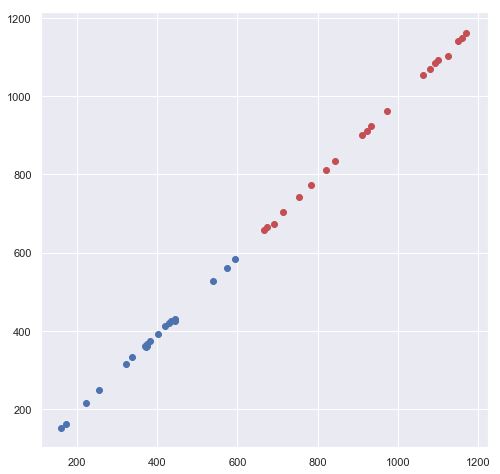

In [86]:
chk=(-1)*np.ones(filtered.shape[0])
for i in range(known_chr1_seg.shape[0]):
    xtest=known_chr1_seg['Genomic bin, Right base'][i]-1
    ytest=known_chr1_seg['Genomic bin, Left base'][i]-1
    for j in range(filtered.shape[0]):
        if ((xtest-filtered[j,0])**2+(ytest-filtered[j,1])**2 <= ceil(filtered[j,2])**2):
            if chk[j]!=(-1):
                print('SHIT')
            else:
                chk[j]=i
unmapped=filtered[chk==-1, :]
mapped=filtered[chk!=-1,:]
plt.figure(figsize=(8,8))
plt.scatter(unmapped[20:40, 0], unmapped[20:40, 1], color='b')
plt.scatter(mapped[20:40, 0], mapped[20:40, 1], color='r')
plt.show()

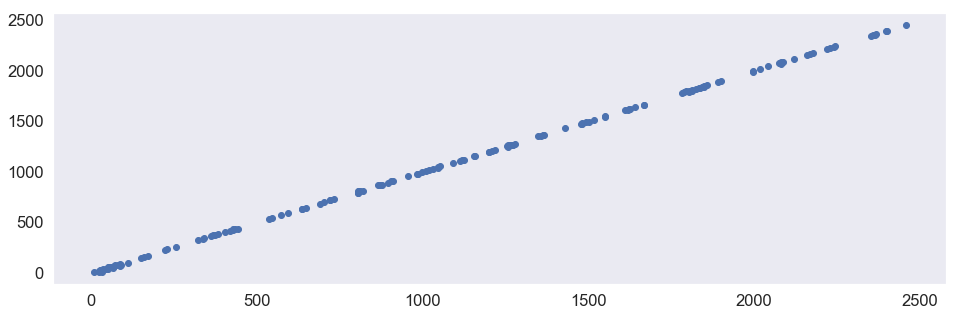

In [75]:
plt.figure(figsize=(16,5))
plt.scatter(unmapped[:, 0], unmapped[:, 1], color='b')
#plt.scatter(mapped[20:40, 0], mapped[20:40, 1], color='r')
plt.show()

672.0 666.0 2.805115557482099 159.53222723697633
690.0 678.0 1.3101975176810488 77.64252264120664
690.0 673.0 2.2396828868769942 99.33478639757477
702.0 693.0 1.6946445632105593 71.79774273119932
709.0 707.0 3.504173326262988 144.16368207394055


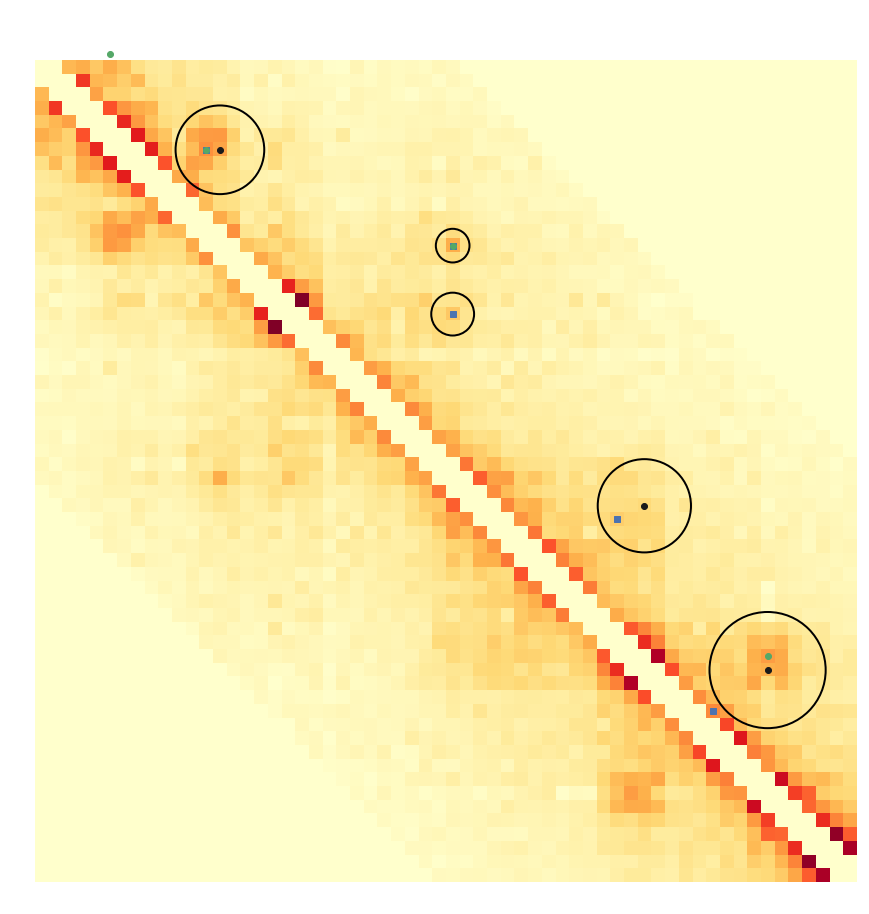

In [29]:
left=660
right=720
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

image=image/np.max(image)*255

fig=plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if np.abs(i-j)>30:
            image[i, j]=0
ax.imshow(image, cmap='YlOrRd')

filtered_cut=filtered[filtered[:,0]>=left]
filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

for step in range(filtered_cut.shape[0]):
    x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
    c = plt.Circle((x-left, y-left), r, color='black', linewidth=2, fill=False)
    ax.plot(x-left, y-left, 'ko')
    ax.add_patch(c)
    ax.plot(xc-left, yc-left, 'bs')
    print(xc, yc, thr1, thr2)
    
ax.set_axis_off()
ax.plot((known_chr1_seg['Genomic bin, Right base']-left-1), (known_chr1_seg['Genomic bin, Left base']-left-1), 'go')
plt.show()

Вывод:

Следует вручную (или придумать реально рабочий детектор, типа 0 на побочной диагонали) разметить "кресты"

In [9]:
unmapped.shape

(129, 7)

(0.95, 1.05)

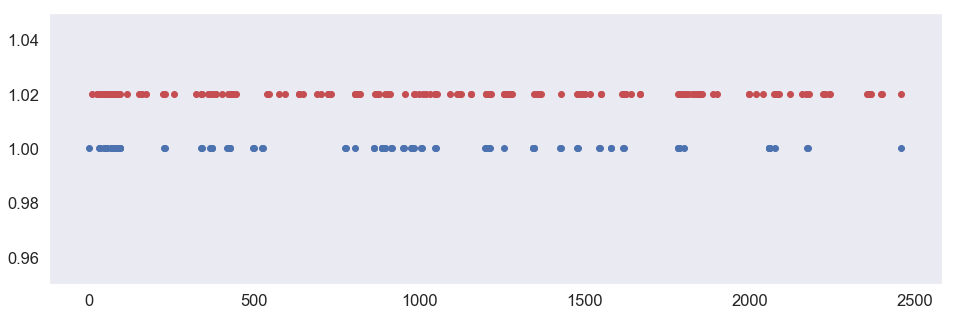

In [76]:
left=0
right=2461
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

cross=[]
for i in range(image.shape[0]-2):
    if (image[i, i+2]==0):
        cross.append(i)

plt.figure(figsize=(16,5))
plt.plot(cross, [1]*len(cross), 'bo')
plt.plot(unmapped[:, 0], [1.02]*unmapped.shape[0], 'ro')
plt.ylim((0.95, 1.05))

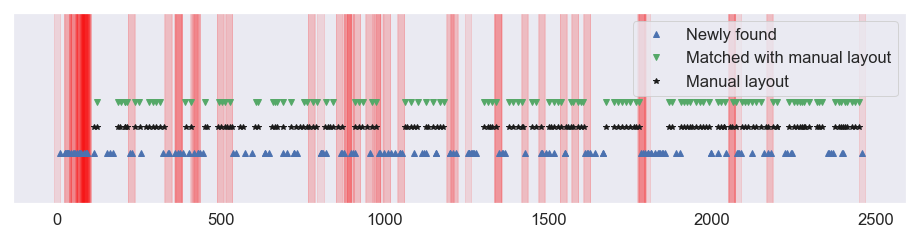

In [77]:
sns.set_style("dark")

left=0
right=2461
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

cross=[]
for i in range(image.shape[0]-2):
    if (image[i, i+2]==0):
        cross.append(i)

plt.figure(figsize=(16,3.5))

#plt.plot(cross, [1]*len(cross), 'bo')
for i in range(len(cross)):
    plt.axvspan(cross[i]-10, cross[i]+10, alpha=0.1, color='red')
plt.plot(unmapped[:, 0], [1]*unmapped.shape[0], 'b^', label='Newly found')
plt.plot(mapped[:, 0], [1.02]*mapped.shape[0], 'gv', label='Matched with manual layout')
plt.plot(known_chr1_seg['Genomic bin, Right base']-left-1, [1.01]*known_chr1_seg.shape[0], 'k*', label='Manual layout')
plt.ylim((0.98, 1.055))
plt.yticks([],[])
plt.legend()

In [48]:
ran=15 #uncertinty range


chk=(-1)*np.ones(filtered.shape[0])
for i in range(known_chr1_seg.shape[0]):
    xtest=known_chr1_seg['Genomic bin, Right base'][i]-1
    ytest=known_chr1_seg['Genomic bin, Left base'][i]-1
    for j in range(filtered.shape[0]):
        if ((xtest-filtered[j,0])**2+(ytest-filtered[j,1])**2 <= ceil(filtered[j,2])**2):
            if chk[j]!=(-1):
                print('SHIT')
            else:
                chk[j]=i
unmapped=filtered[chk==-1, :]
mapped=filtered[chk!=-1,:]

for i in range(filtered.shape[0]):
    if chk[i]==-1:
        for j in range(len(cross)):
            if abs(filtered[i, 0]-cross[j])<=ran:
                chk[i]=-2
                
filtered_crossed=filtered[chk!=-2, :]

st=0
for i in range(known_chr1_seg.shape[0]):
    if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1, filtered_crossed):
        continue
    else:
        st+=1
        #l1=int(max(known_chr1_seg['Genomic bin, Left base'][i]-1-15, 0))
        #r1=l1+30
        print('        NOT FOUND:   ', known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1)
        #BarbekuFinderFrameDraw(loopfile=loopfile, layoutfile=layoutfile, left=l1, right=r1, k=5, thresh=0.5, thresh2=60, min_sigma=0.5, max_sigma=5)

print(st, '/', known_chr1_seg.shape[0], '/', filtered_crossed.shape[0])
print('Sensitivity: ', 1-st/known_chr1_seg.shape[0])
print('FDR: ', (filtered_crossed.shape[0]+st-known_chr1_seg.shape[0])/filtered_crossed.shape[0])

        NOT FOUND:    113.0 106.0
        NOT FOUND:    193.0 186.0
        NOT FOUND:    271.0 267.0
        NOT FOUND:    328.0 313.0
        NOT FOUND:    458.0 452.0
        NOT FOUND:    518.0 513.0
        NOT FOUND:    533.0 527.0
        NOT FOUND:    569.0 552.0
        NOT FOUND:    741.0 733.0
        NOT FOUND:    770.0 763.0
        NOT FOUND:    828.0 820.0
        NOT FOUND:    833.0 828.0
        NOT FOUND:    857.0 844.0
        NOT FOUND:    871.0 857.0
        NOT FOUND:    946.0 932.0
        NOT FOUND:    1069.0 1063.0
        NOT FOUND:    1090.0 1080.0
        NOT FOUND:    1131.0 1126.0
        NOT FOUND:    1159.0 1149.0
        NOT FOUND:    1321.0 1316.0
        NOT FOUND:    1477.0 1468.0
        NOT FOUND:    1503.0 1495.0
        NOT FOUND:    1508.0 1504.0
        NOT FOUND:    1554.0 1538.0
        NOT FOUND:    1559.0 1554.0
        NOT FOUND:    1576.0 1570.0
        NOT FOUND:    1761.0 1751.0
        NOT FOUND:    1769.0 1761.0
        NOT FOUND:    

In [49]:
ran=10 #uncertinty range


chk=(-1)*np.ones(filtered.shape[0])
for i in range(known_chr1_seg.shape[0]):
    xtest=known_chr1_seg['Genomic bin, Right base'][i]-1
    ytest=known_chr1_seg['Genomic bin, Left base'][i]-1
    for j in range(filtered.shape[0]):
        if ((xtest-filtered[j,0])**2+(ytest-filtered[j,1])**2 <= ceil(filtered[j,2])**2):
            if chk[j]!=(-1):
                print('SHIT')
            else:
                chk[j]=i
unmapped=filtered[chk==-1, :]
mapped=filtered[chk!=-1,:]

for i in range(filtered.shape[0]):
    for j in range(len(cross)):
        if abs(filtered[i, 0]-cross[j])<=ran:
            chk[i]=-2
                
filtered_crossed=filtered[chk!=-2, :]

st=0
for i in range(known_chr1_seg.shape[0]):
    if brbq.IsDetected(known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1, filtered_crossed):
        continue
    else:
        st+=1
        #l1=int(max(known_chr1_seg['Genomic bin, Left base'][i]-1-15, 0))
        #r1=l1+30
        print('        NOT FOUND:   ', known_chr1_seg['Genomic bin, Right base'][i]-1, known_chr1_seg['Genomic bin, Left base'][i]-1)
        #BarbekuFinderFrameDraw(loopfile=loopfile, layoutfile=layoutfile, left=l1, right=r1, k=5, thresh=0.5, thresh2=60, min_sigma=0.5, max_sigma=5)

print(st, '/', known_chr1_seg.shape[0], '/', filtered_crossed.shape[0])
print('Sensitivity: ', 1-st/known_chr1_seg.shape[0])
print('FDR: ', (filtered_crossed.shape[0]+st-known_chr1_seg.shape[0])/filtered_crossed.shape[0])

        NOT FOUND:    113.0 106.0
        NOT FOUND:    193.0 186.0
        NOT FOUND:    238.0 225.0
        NOT FOUND:    271.0 267.0
        NOT FOUND:    328.0 313.0
        NOT FOUND:    410.0 403.0
        NOT FOUND:    458.0 452.0
        NOT FOUND:    492.0 477.0
        NOT FOUND:    502.0 496.0
        NOT FOUND:    514.0 504.0
        NOT FOUND:    518.0 513.0
        NOT FOUND:    527.0 519.0
        NOT FOUND:    533.0 527.0
        NOT FOUND:    569.0 552.0
        NOT FOUND:    741.0 733.0
        NOT FOUND:    770.0 763.0
        NOT FOUND:    782.0 770.0
        NOT FOUND:    828.0 820.0
        NOT FOUND:    833.0 828.0
        NOT FOUND:    857.0 844.0
        NOT FOUND:    871.0 857.0
        NOT FOUND:    911.0 901.0
        NOT FOUND:    923.0 912.0
        NOT FOUND:    946.0 932.0
        NOT FOUND:    962.0 947.0
        NOT FOUND:    973.0 963.0
        NOT FOUND:    1069.0 1063.0
        NOT FOUND:    1090.0 1080.0
        NOT FOUND:    1131.0 1126.0
        

In [50]:
diag_mapped=np.zeros(31)
diag_unmapped=np.zeros(31)

for i in range(mapped.shape[0]):
    diag_mapped[int(abs(mapped[i,0]-mapped[i,1]))]+=1
for i in range(mapped.shape[0]):
    diag_unmapped[int(abs(unmapped[i,0]-unmapped[i,1]))]+=1

/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


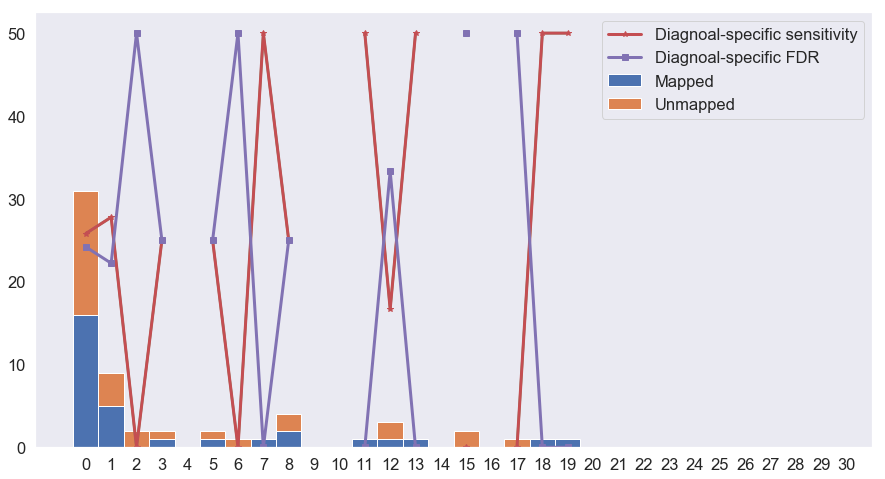

In [51]:
plt.figure(figsize=(15, 8))
h=plt.hist([diag_mapped, diag_unmapped], bins=np.arange(31)-0.5, stacked=True, label=['Mapped', 'Unmapped'])
plt.xticks(range(31))
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h[0][1]))
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h[0][1]), '*-', linewidth=3, label='Diagnoal-specific sensitivity')
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][1]-h[0][0], h[0][1]), 's-', linewidth=3, label='Diagnoal-specific FDR')
plt.legend()

/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


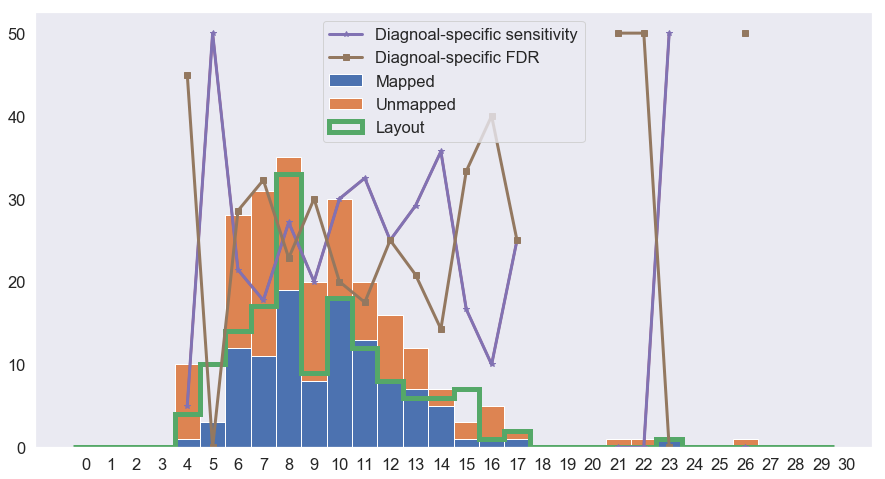

In [52]:
diag_layout=np.abs(known_chr1_seg['Genomic bin, Right base']-known_chr1_seg['Genomic bin, Left base'])
diag_mapped=np.abs(mapped[:,0]-mapped[:,1])
diag_unmapped=np.abs(unmapped[:,0]-unmapped[:,1])

plt.figure(figsize=(15, 8))
h=plt.hist([diag_mapped, diag_unmapped], bins=np.arange(31)-0.5, stacked=True, label=['Mapped', 'Unmapped'])
plt.hist(diag_layout, bins=np.arange(31)-0.5, stacked=True, histtype='step', linewidth=5, fill=False, label='Layout')
plt.xticks(range(31))
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h[0][1]))
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h[0][1]), '*-', linewidth=3, label='Diagnoal-specific sensitivity')
plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][1]-h[0][0], h[0][1]), 's-', linewidth=3, label='Diagnoal-specific FDR')
plt.legend()

/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


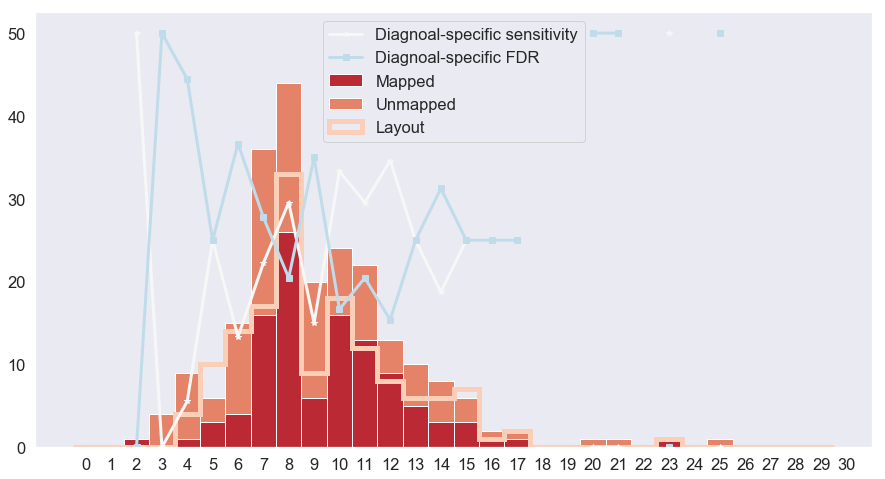

In [53]:


diag_layout=np.abs(known_chr1_seg['Genomic bin, Right base']-known_chr1_seg['Genomic bin, Left base'])
diag_mapped=np.abs(mapped[:,3]-mapped[:,4])
diag_unmapped=np.abs(unmapped[:,3]-unmapped[:,4])

with sns.color_palette("RdBu", 7):
    plt.figure(figsize=(15, 8))
    h=plt.hist([diag_mapped, diag_unmapped], bins=np.arange(31)-0.5, stacked=True, label=['Mapped', 'Unmapped'])
    plt.hist(diag_layout, bins=np.arange(31)-0.5, stacked=True, histtype='step', linewidth=5, fill=False, label='Layout')
    plt.xticks(range(31))
    plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h[0][1]), '*-', linewidth=3, label='Diagnoal-specific sensitivity')
    plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][1]-h[0][0], h[0][1]), 's-', linewidth=3, label='Diagnoal-specific FDR')
    plt.legend()

665.0 659.0 1.662801822538289 158.51665679966234
672.0 666.0 2.4636589757404677 159.53222723697633
690.0 678.0 1.3101975176810488 77.64252264120664
690.0 673.0 2.2396828868769942 99.33478639757477
702.0 693.0 0.9894521555597083 71.79774273119932
713.0 703.0 1.5174589445421236 126.03241298897716


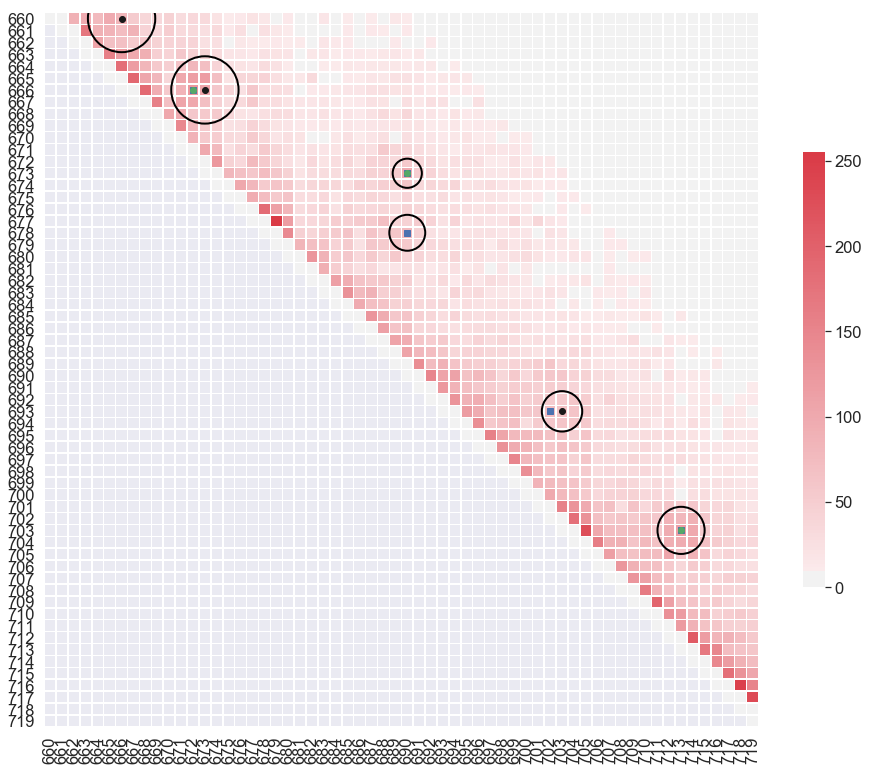

In [54]:
left=660
right=720
image, known_chr1_seg=brbq.fileParser(loopfile, layoutfile, left, right)

image=image/np.max(image)*255

fig=plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if np.abs(i-j)>30:
            image[i, j]=0
            
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
mask = np.zeros_like(image, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask=np.invert(mask)

with sns.axes_style("white"):
    sns.heatmap(image, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=range(left, right), yticklabels=range(left, right))

filtered_cut=filtered[filtered[:,0]>=left]
filtered_cut=filtered_cut[filtered_cut[:,0]<=right]
filtered_cut=filtered_cut[filtered_cut[:,1]>=left]
filtered_cut=filtered_cut[filtered_cut[:,1]<=right]

for step in range(filtered_cut.shape[0]):
    x, y, r, xc, yc, thr1, thr2 = filtered_cut[step, :]
    c = plt.Circle((x-left+0.5, y-left+0.5), r, color='black', linewidth=2, fill=False)
    ax.plot(x-left+0.5, y-left+0.5, 'ko')
    ax.add_patch(c)
    ax.plot(xc-left+0.5, yc-left+0.5, 'bs')
    print(xc, yc, thr1, thr2)
    
#plt.xticks(range(left, right))
#plt.yticks(range(left, right))
#ax.set_axis_off()
plt.plot((known_chr1_seg['Genomic bin, Right base']-left-0.5), (known_chr1_seg['Genomic bin, Left base']-left-0.5), 'go')

/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


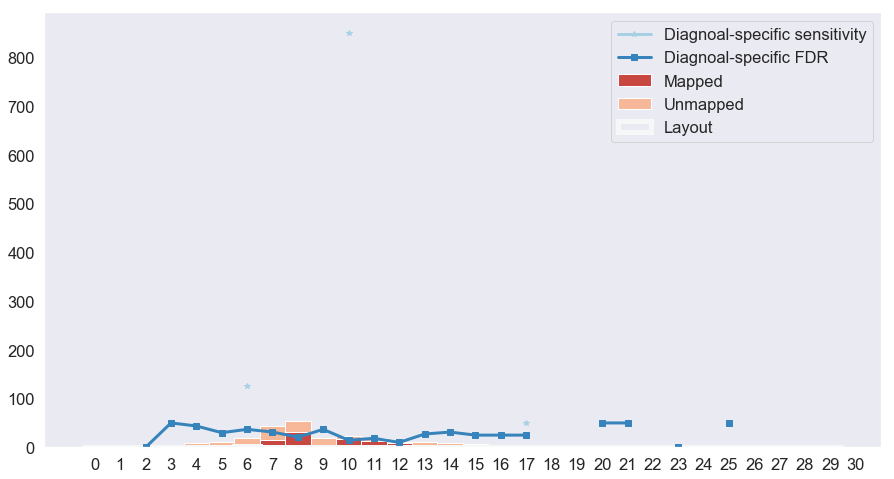

In [19]:
diag_layout=np.abs(known_chr1_seg['Genomic bin, Right base']-known_chr1_seg['Genomic bin, Left base'])
diag_mapped=np.abs(mapped[:,3]-mapped[:,4])
diag_unmapped=np.abs(unmapped[:,3]-unmapped[:,4])

sns.set_style("dark")

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
with sns.color_palette("RdBu",5):
    plt.figure(figsize=(15, 8))
    h=plt.hist([diag_mapped, diag_unmapped], bins=np.arange(31)-0.5, stacked=True, label=['Mapped', 'Unmapped'])
    h2=plt.hist(diag_layout, bins=np.arange(31)-0.5, stacked=True, histtype='step', linewidth=5, fill=False, label='Layout')
    plt.xticks(range(31))
    plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h2[0]), '*-', linewidth=3, label='Diagnoal-specific sensitivity')
    plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][1]-h[0][0], h[0][1]), 's-', linewidth=3, label='Diagnoal-specific FDR')
    plt.legend()

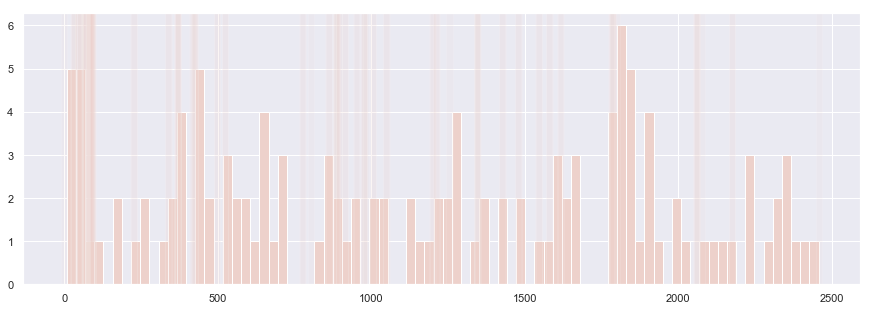

In [20]:
sns.set()
#with sns.color_palette("RdBu"):
with sns.cubehelix_palette():
    plt.figure(figsize=(15, 5))
    plt.hist(unmapped[:, 0], bins=int(2461/30))
    for i in range(len(cross)):
        plt.axvspan(cross[i]-10, cross[i]+10, alpha=0.1)

/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/mryodo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


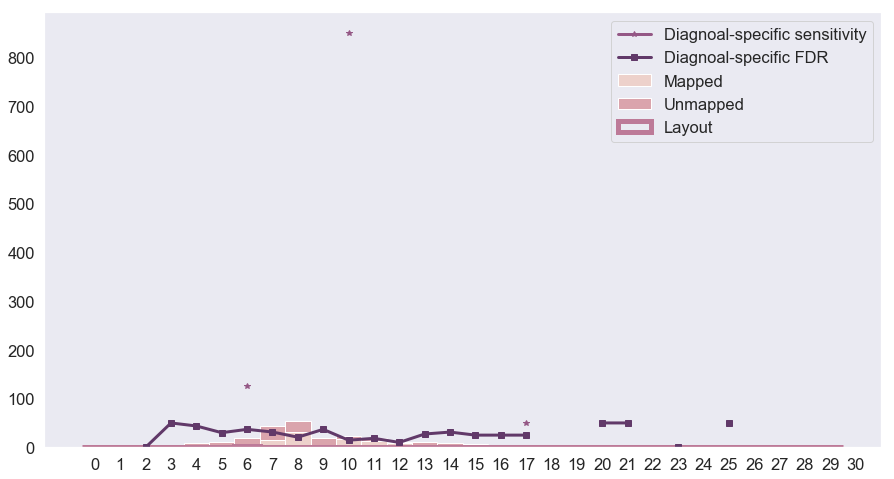

In [21]:
diag_layout=np.abs(known_chr1_seg['Genomic bin, Right base']-known_chr1_seg['Genomic bin, Left base'])
diag_mapped=np.abs(mapped[:,3]-mapped[:,4])
diag_unmapped=np.abs(unmapped[:,3]-unmapped[:,4])

sns.set_style("dark")

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
with sns.cubehelix_palette():
    plt.figure(figsize=(15, 8))
    h=plt.hist([diag_mapped, diag_unmapped], bins=np.arange(31)-0.5, stacked=True, label=['Mapped', 'Unmapped'])
    h2=plt.hist(diag_layout, bins=np.arange(31)-0.5, stacked=True, histtype='step', linewidth=5, fill=False, label='Layout')
    plt.xticks(range(31))
    plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][0], h2[0]), '*-', linewidth=3, label='Diagnoal-specific sensitivity')
    plt.plot([(h[1][i]+h[1][i+1])/2 for i in range(h[1].shape[0]-1)], 50*np.divide(h[0][1]-h[0][0], h[0][1]), 's-', linewidth=3, label='Diagnoal-specific FDR')
    plt.legend()